# EXTRACTING SIMILAR TWEETS

Find all sentence which are similar tweet, with tweet_index = 888.

Explain the reason behind the similarity and methodology which you used to find it.

I will be using vaderSentiment

pip install vaderSentiment

Read more about it here: https://www.nltk.org/_modules/nltk/sentiment/vader.html

---------

# IMPORT LIBRARIES

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

----------

# LOAD PROCESSED DATASET

In [3]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [4]:
import pandas as pd
dataset = pd.read_csv('/content/gdrive/MyDrive/NOVA_Sentiment_Analysis.csv')

In [5]:
dataset.head()

,Unnamed: 0,Tweets,Sbjectivity_Scale,Polarity_Scale,Sentiment_Tags
0,0,hepburn say,0.000000,0.00000,Neutral
1,1,plus i ve add commercial experience tacky,0.000000,0.00000,Neutral
2,2,today must mean need take another trip,0.687500,-0.31250,Negative
3,3,really aggressive blast obnoxious entertainmen...,0.350000,0.00625,Positive
4,4,really big bad thing,0.383333,-0.35000,Negative


In [92]:
dataset.shape

(2000, 1)

In [94]:
dataset.describe()

,Tweets
count,2000
unique,1972
top,thank
freq,16


In [95]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweets  2000 non-null   object
dtypes: object(1)
memory usage: 15.8+ KB


In [6]:
# Drop unwanted Columns:
dataset.drop(['Unnamed: 0', 'Sbjectivity_Scale', 'Polarity_Scale', 'Sentiment_Tags'], axis = 1, inplace = True)
dataset.head()

,Tweets
0,hepburn say
1,plus i ve add commercial experience tacky
2,today must mean need take another trip
3,really aggressive blast obnoxious entertainmen...
4,really big bad thing


-----------

# CREATE RULE-BASED ANALYZER

In [ ]:
pip install vaderSentiment

In [8]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
rule_based_analyzer = SentimentIntensityAnalyzer()

In [9]:
samp_string = dataset['Tweets'].iloc[888]
samp_string

In [10]:
samp_test = rule_based_analyzer.polarity_scores(samp_string)
print("{}… {}".format(samp_string[:100], str(samp_test)))

clear luggage comment reference photo attach flight 6232 jam help t co pnbajfkmhg… {'neg': 0.0, 'neu': 0.675, 'pos': 0.325, 'compound': 0.6486}


In [21]:
dataset.dtypes

Tweets    object
dtype: object

In [24]:
# Change DataType
dataset["Tweets"] = dataset["Tweets"].astype(str)

In [33]:
tweets_with_score = []
for t in dataset['Tweets']:
    txt = t[:100]
    pola_score = rule_based_analyzer.polarity_scores(txt)
    tweets_with_score.append({'Tweets':txt, 'Compound_Score': pola_score['compound']})

In [86]:
# Convert LIST Type to DATAFRAME
df_tweets_with_score = pd.DataFrame(tweets_with_score)

In [58]:
df_tweets_with_score.head()

,Tweets,Compound_Score
0,hepburn say,0.0000
1,plus i ve add commercial experience tacky,0.0000
2,today must mean need take another trip,0.0000
3,really aggressive blast obnoxious entertainmen...,-0.3306
4,really big bad thing,-0.5829


In [61]:
# Check COMPOUND_SCORE for TWEET 888
tweet888 = df_tweets_with_score.iloc[888:889, :]
tweet888

,Tweets,Compound_Score
888,clear luggage comment reference photo attach f...,0.6486


------------

# CHECK DISTRIBUTION OF COMPOUND_SCORE

Text(0.5, 1.0, 'COMPOUND_SCORE')

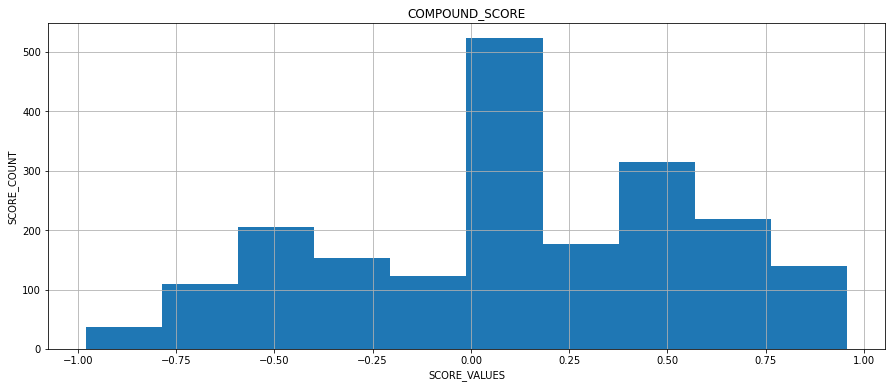

In [68]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (15,6)

plt.hist(df_tweets_with_score.Compound_Score)
plt.grid(True)

plt.xlabel('SCORE_VALUES')
plt.ylabel('SCORE_COUNT')
plt.title('COMPOUND_SCORE')

In [84]:
df_tweets_with_score.head()

,Tweets,Compound_Score
0,hepburn say,0.0000
1,plus i ve add commercial experience tacky,0.0000
2,today must mean need take another trip,0.0000
3,really aggressive blast obnoxious entertainmen...,-0.3306
4,really big bad thing,-0.5829


In [96]:
df_tweets_with_score.describe()

,Compound_Score
count,2000.000000
mean,0.102075
std,0.442787
min,-0.979200
25%,-0.226300
50%,0.000000
75%,0.440400
max,0.956500


# SIMILAR TWEETS

In [90]:
pd.DataFrame(df_tweets_with_score[df_tweets_with_score['Compound_Score'] == 0.6486])

,Tweets,Compound_Score
24,guy mess seat reserve seating friend guy give ...,0.6486
545,yes i ve agent last 50 minute one agent rude t...,0.6486
696,speak real person get resolve politely efficie...,0.6486
708,thanks remember load bag onto connect flight o...,0.6486
709,thank cheese platter abundance entertainment o...,0.6486
878,3 day late flight bag leave iad united help ev...,0.6486
888,clear luggage comment reference photo attach f...,0.6486
916,thank respond quickly helpful tool dusty,0.6486
1116,jms2802 sure show video outsource favorite tic...,0.6486
1626,resolve hour work ground amp somehow system re...,0.6486
